In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import statsmodels.api as sm
import scipy.stats as scs
from statsmodels.stats.outliers_influence import variance_inflation_factor

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier 

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
print('shape of train is: ', train.shape)
print('shape of test is: ', test.shape)

shape of train is:  (1460, 81)
shape of test is:  (1459, 80)


In [4]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
x = pd.DataFrame(train.dtypes[train.dtypes == int]).reset_index()

In [6]:
x

,index,0
0,Id,int64
1,MSSubClass,int64
2,LotArea,int64
3,OverallQual,int64
4,OverallCond,int64
5,YearBuilt,int64
6,YearRemodAdd,int64
7,BsmtFinSF1,int64
8,BsmtFinSF2,int64
9,BsmtUnfSF,int64


In [7]:
if train.columns[6] == x['index'][1]:
    print(train[train.columns[1]].isnull().sum())

In [8]:
train.select_dtypes(exclude = ['object']).isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [9]:
train.select_dtypes(include = ['object']).isnull().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

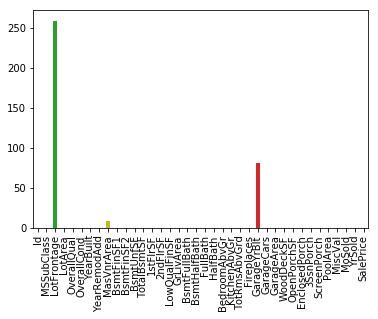

In [10]:
(train.select_dtypes(exclude = ['object']).isnull().sum()).plot(kind = 'bar')
plt.show()

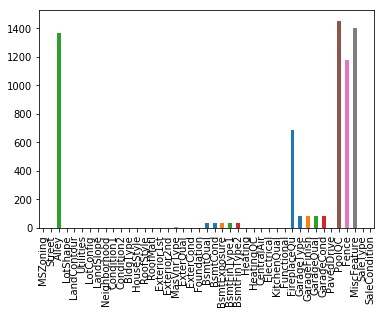

In [11]:
(train.select_dtypes(include = ['object']).isnull().sum()).plot(kind = 'bar')
plt.show()

In [12]:
(train.YearRemodAdd == train.YearBuilt).sum()

764

In [13]:
(train.YearRemodAdd != train.YearBuilt).sum()

696

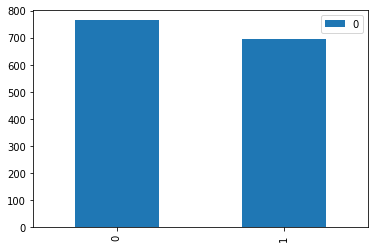

In [14]:
pd.DataFrame([(train.YearRemodAdd == train.YearBuilt).sum(), (train.YearRemodAdd != train.YearBuilt).sum()]).plot(kind ='bar')

In [15]:
dict = pd.DataFrame({'yes' : ((train.YearRemodAdd != train.YearBuilt).sum()),
'no' : ((train.YearRemodAdd == train.YearBuilt).sum())}, index = [0])

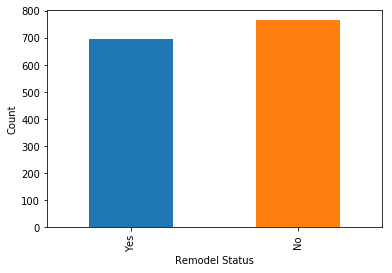

In [16]:
dict.unstack().plot(kind = 'bar')
plt.xlabel('Remodel Status')
plt.ylabel('Count')
plt.xticks([0,1],['Yes', 'No'])
plt.show()

In [17]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [18]:
(train.isnull().sum().sum())/(train.shape[0]*train.shape[1])

0.05889565364451209

In [19]:
(test.isnull().sum().sum())/(test.shape[0]*test.shape[1])

0.059972583961617545

In [20]:
train.duplicated().sum()

0

In [21]:
train.MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [22]:
train.select_dtypes(include = ['object']).columns[0]

'MSZoning'

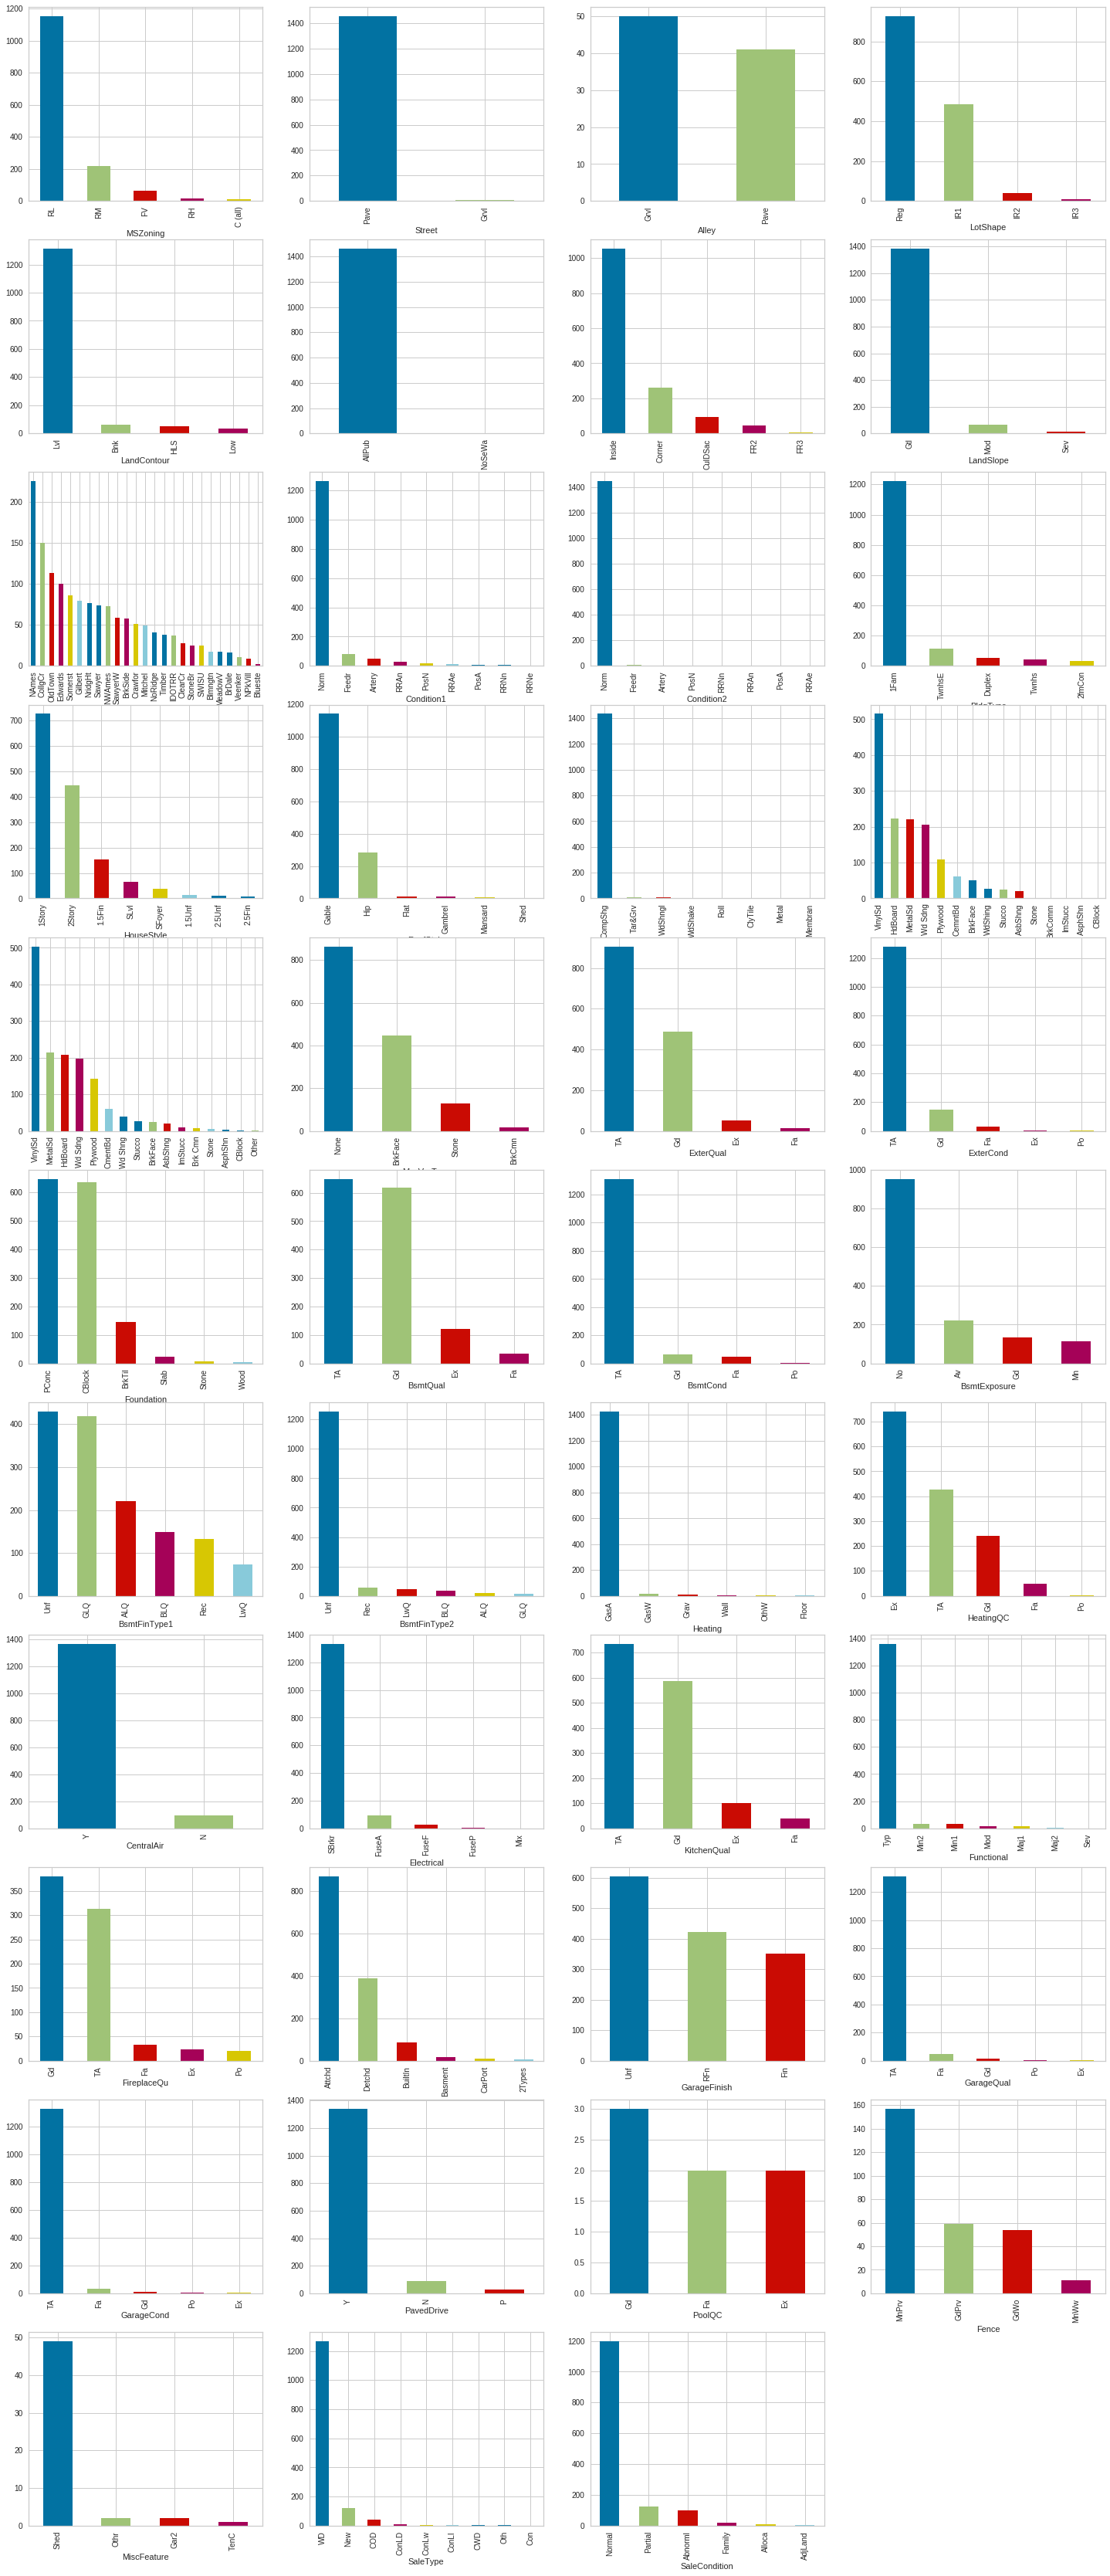

In [145]:
def cat_barplot():
    for n in range(0, 43):
        plt.subplot(11, 4, n+1)
        train.select_dtypes(include = ['object']).iloc[:,n].value_counts().plot(kind = 'bar')
        plt.xlabel(train.select_dtypes(include = ['object']).iloc[:,n].name)
plt.figure(figsize = (25, 60))
cat_barplot()
plt.show()

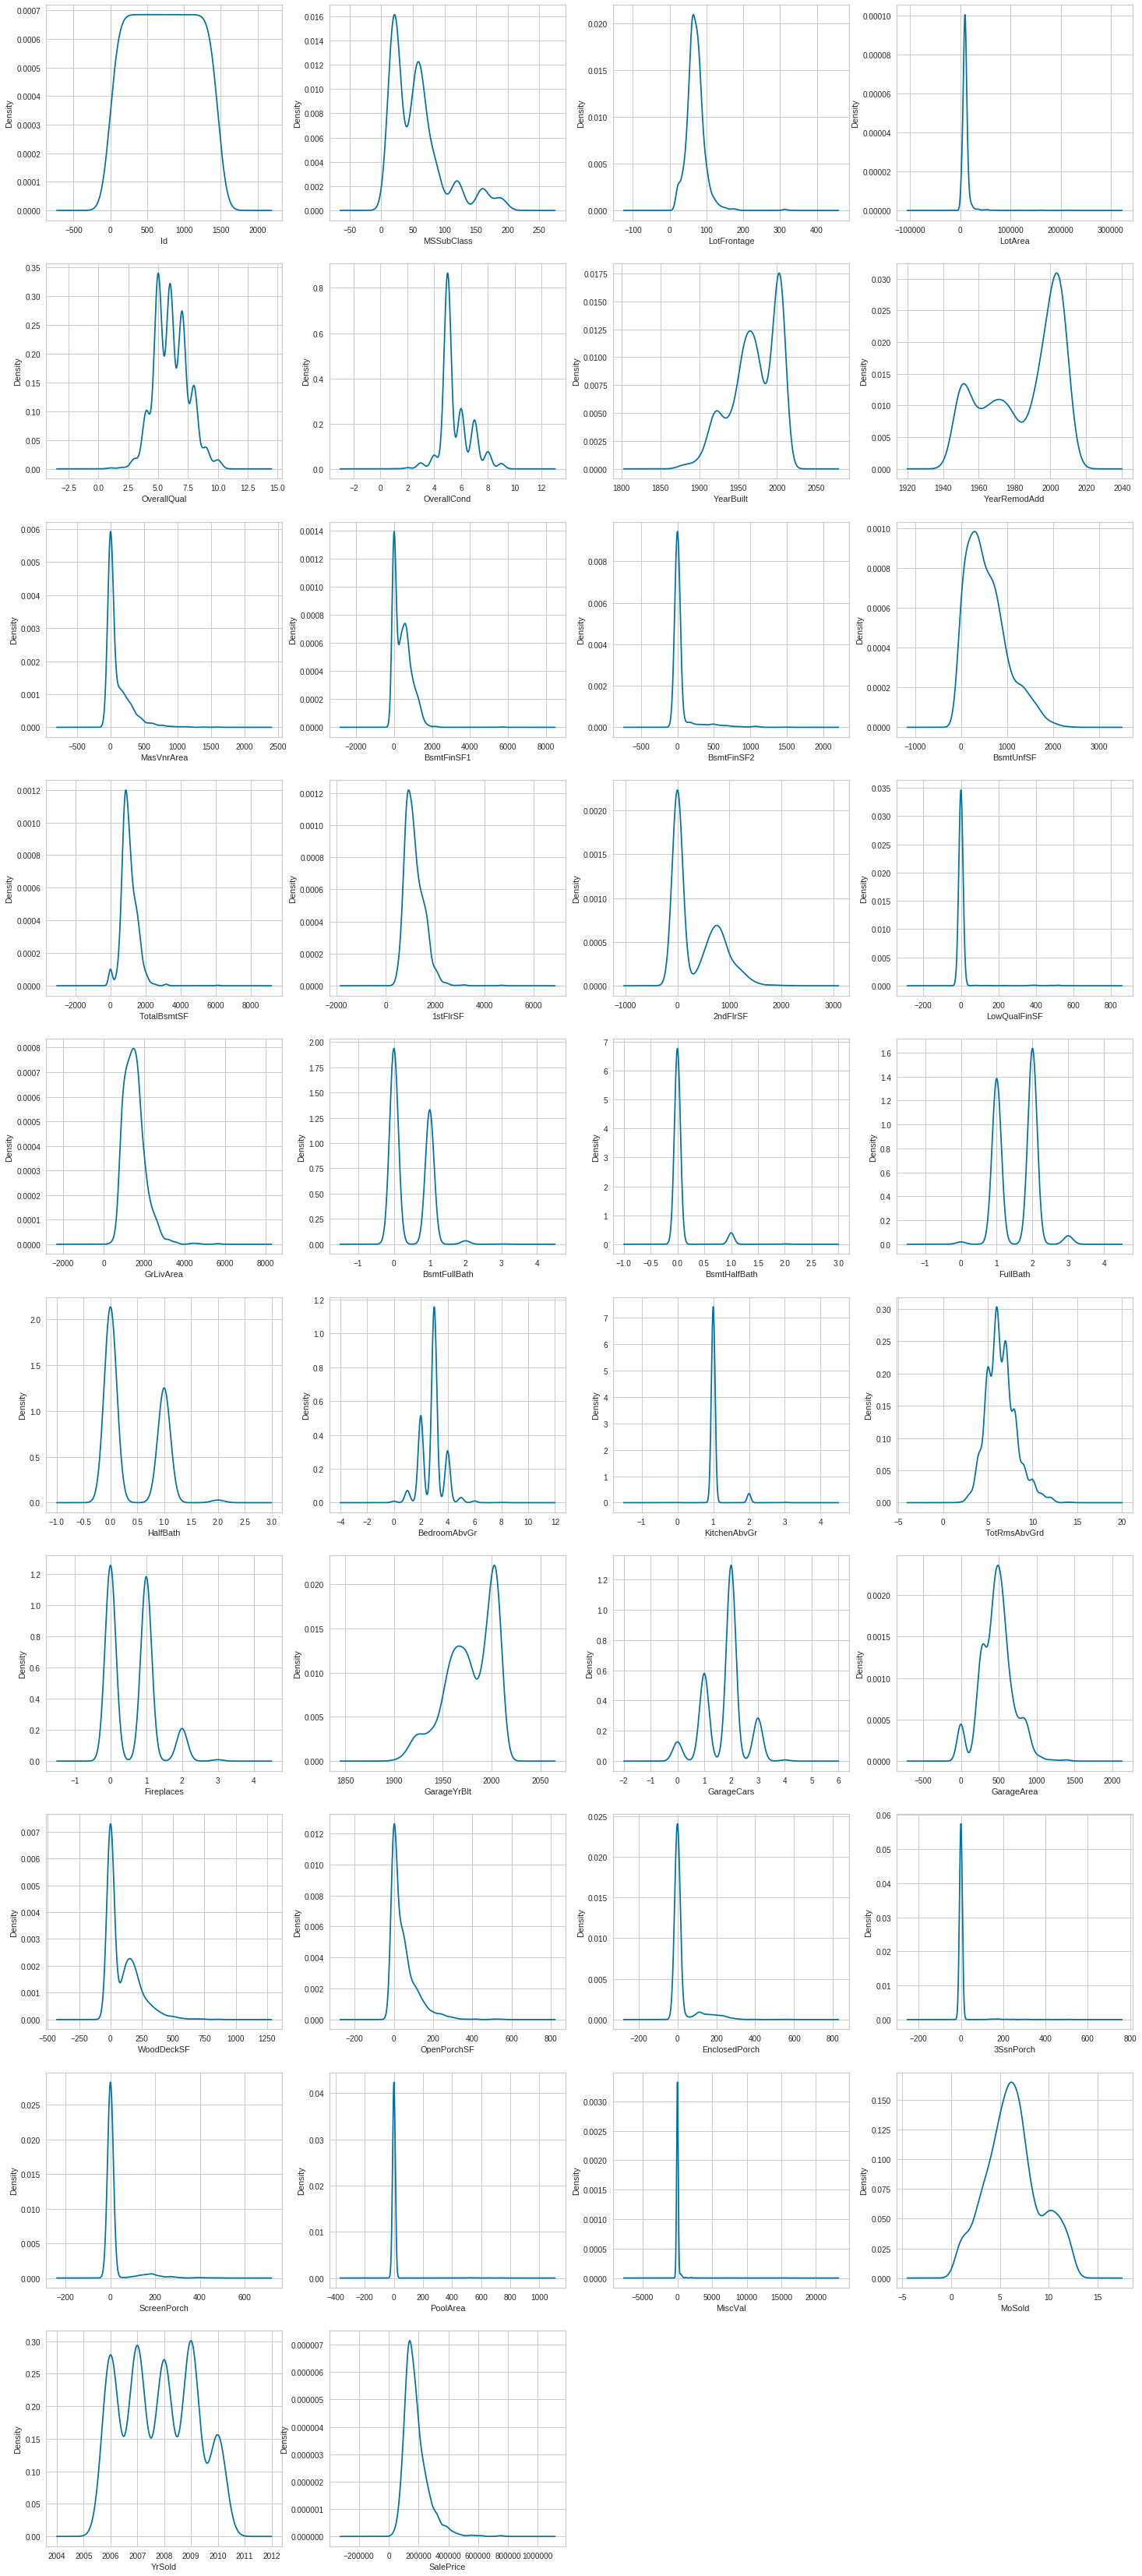

In [153]:
def num_densityplot():
    for n in range(0, 38):
        plt.subplot(10, 4, n+1)
        train.select_dtypes(exclude = ['object']).iloc[:,n].plot.kde()
        plt.xlabel(train.select_dtypes(exclude = ['object']).iloc[:,n].name)
plt.figure(figsize = (25, 60))
num_densityplot()
plt.show()

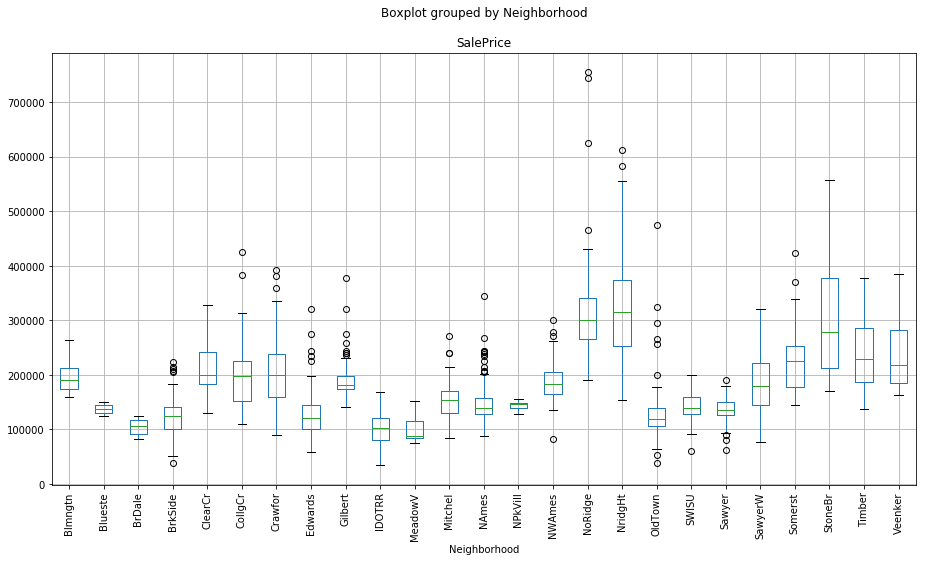

In [27]:
train.boxplot("SalePrice", "Neighborhood", figsize=(15, 8), rot = 90)
plt.show()

In [28]:
#train.select_dtypes(exclude = ['object']).corr()

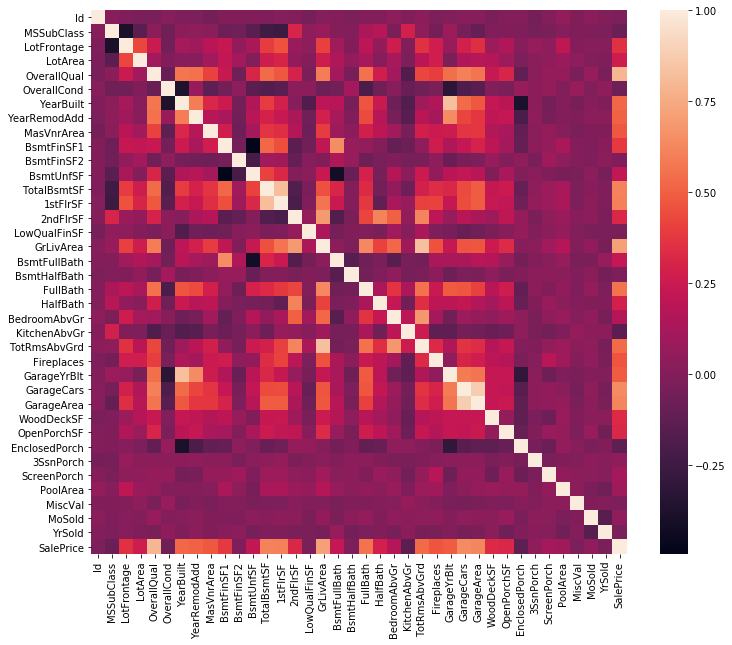

In [29]:
plt.figure(figsize = (12,10))
sns.heatmap(train.select_dtypes(exclude = ['object']).corr())
plt.show()

In [30]:
train.select_dtypes(exclude = ['object']).corr()['SalePrice'].sort_values( axis = 0, ascending = False)[1:9]

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
Name: SalePrice, dtype: float64

In [31]:
train.select_dtypes(exclude = ['object']).corr()['SalePrice'].sort_values( axis = 0, ascending = True)[0:4]

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
Name: SalePrice, dtype: float64

In [32]:
#list(pd.DataFrame(train.select_dtypes(exclude = ['object']).corr()['SalePrice'].sort_values( axis = 0, ascending = True)[0:4]).index)

In [33]:
list = ['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','KitchenAbvGr', 'EnclosedPorch', 'MSSubClass', 'OverallCond']

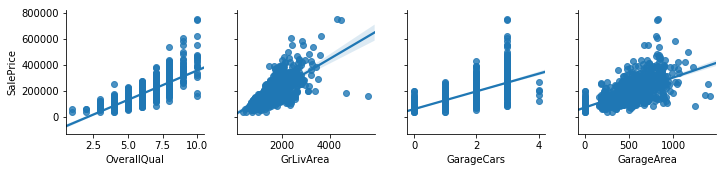

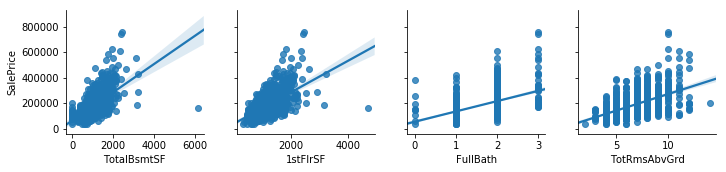

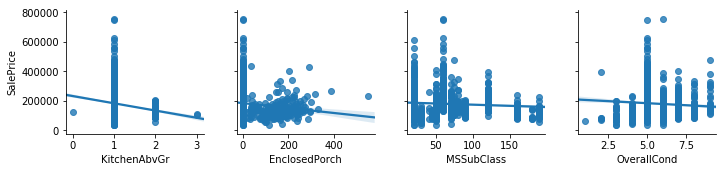

In [34]:
sns.pairplot(train, x_vars = list[0: 4], y_vars = ['SalePrice'], kind = 'reg')
sns.pairplot(train, x_vars = list[4: 8], y_vars = ['SalePrice'], kind = 'reg')
sns.pairplot(train, x_vars = list[8: 12], y_vars = ['SalePrice'], kind = 'reg')
plt.show()

In [35]:
(train.select_dtypes(include = ['object']).columns)[1]

'Street'

In [36]:
def cat_Sales():
    for n in range(0, 43):
        plt.subplot(11, 4, n+1)
        sns.boxplot(y = train["SalePrice"], x = train.select_dtypes(include = ['object']).iloc[:,n])
        plt.xticks(rotation = 90)
        #plt.show()

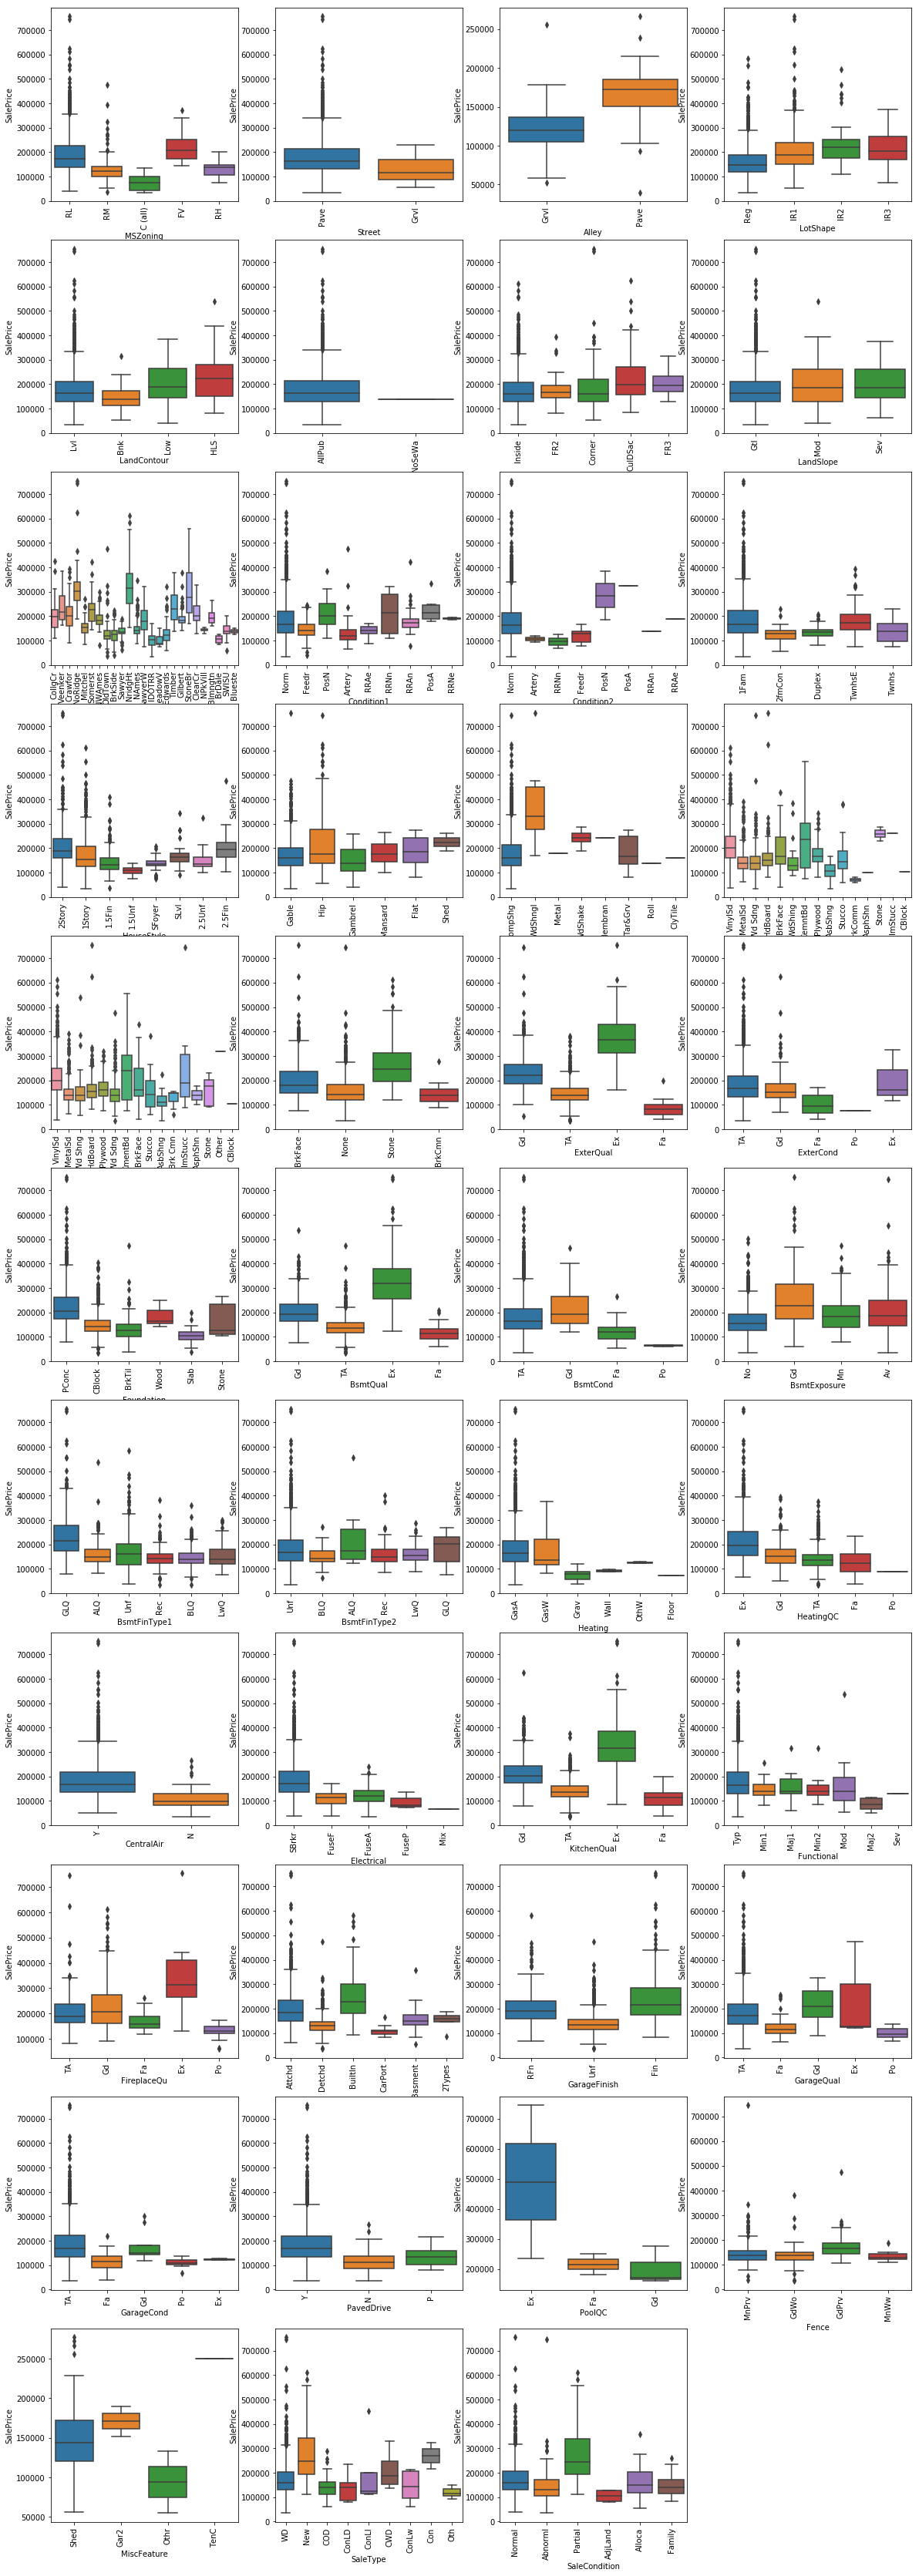

In [37]:
plt.figure(figsize=(20, 60))
cat_Sales()
plt.show()

In [38]:
train_num = train.select_dtypes(exclude = ['object'])
train_cat = train.select_dtypes(include = ['object'])

test_num = test.select_dtypes(exclude = ['object'])
test_cat = test.select_dtypes(include = ['object'])

In [39]:
train_num = train_num.fillna(0)
test_num = test_num.fillna(0)

In [40]:
train_cat = train_cat.fillna('Unavailable')
test_cat = test_cat.fillna('Unavailable')

In [41]:
train_cat1 = pd.get_dummies(train_cat)
test_cat1 = pd.get_dummies(test_cat)

In [42]:
train_cat1.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,Alley_Unavailable,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0


In [43]:
from sklearn.preprocessing import StandardScaler
train_num.iloc[:, :-1] = StandardScaler().fit_transform(train_num.iloc[:, :-1])
test_num.iloc[:, :] = StandardScaler().fit_transform(test_num.iloc[:, :])

/home/m/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/m/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/m/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/m/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [44]:
train_num.SalePrice = np.log(train_num.SalePrice)

In [45]:
train_X = pd.concat([train_num, train_cat1], axis = 1)
test_X = pd.concat([test_num, test_cat1], axis = 1)

In [46]:
X = train_X.drop('SalePrice', axis = 1)
y = train_X.SalePrice

In [47]:
X = X[pd.DataFrame([set(X.columns).intersection(set(test_X.columns))]).T[0]]
test_X = test_X[pd.DataFrame([set(test_X.columns).intersection(set(X.columns))]).T[0]]

In [48]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 1)

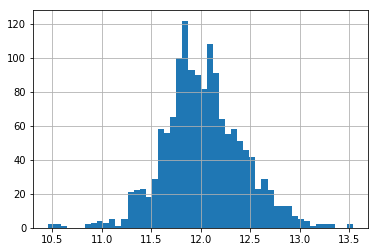

In [49]:
y.hist(bins = 50)
plt.show()

In [50]:
simple_model = sm.OLS(y_train, X_train)
simple_results = simple_model.fit()
simple_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     61.21
Date:                Fri, 04 Jan 2019   Prob (F-statistic):               0.00
Time:                        13:43:26   Log-Likelihood:                 1087.6
No. Observations:                1168   AIC:                            -1687.
Df Residuals:                     924   BIC:                            -451.9
Df Model:                         243                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
BsmtFinType1_ALQ             0.1457      0.017      8.684      0.000       0.113       0.179
Fence_MnPrv                  0.1936      0.020      9.790      0.000       0.155       0.232
ExterQual_Fa                 0.1971      0.054      3.649      0.000       0.091       0.303
LotConfig_FR3                0.1557      0.055      2.841      0.005       0.048       0.263
FireplaceQu_TA               0.1563      0.017      9.088      0.000       0.123       0.190
PoolQC_Unavailable           3.9217      0.415      9.461      0.000       3.108       4.735
BsmtCond_Fa                  0.1677      0.056      3.001      0.003       0.058       0.277
LotConfig_Inside             0.1929      0.021      9.401      0.000       0.153       0.233
YrSold                      -0.0021      0.004     -0.575      0.566      -0.009       0.005
WoodDeckSF                   0.0114      0.004      2.863      0.004       0.004       0.019
Neighborhood_NoRidge         0.1061      0.027      3.975      0.000       0.054       0.159
HouseStyle_1.5Unf            0.1295      0.101      1.279      0.201      -0.069       0.328
Condition1_PosN              0.1680      0.034      4.958      0.000       0.102       0.235
Exterior2nd_VinylSd          0.1165      0.114      1.018      0.309      -0.108       0.341
HouseStyle_1.5Fin            0.1198      0.086      1.389      0.165      -0.049       0.289
SaleCondition_Abnorml        0.1401      0.033      4.186      0.000       0.074       0.206
LandSlope_Sev                0.2350      0.049      4.829      0.000       0.139       0.330
MiscFeature_Othr             0.5050      0.129      3.926      0.000       0.253       0.757
SaleType_ConLw               0.0319      0.065      0.490      0.624      -0.096       0.160
LandContour_Bnk              0.2160      0.024      8.938      0.000       0.169       0.263
Neighborhood_CollgCr         0.0390      0.016      2.410      0.016       0.007       0.071
Electrical_SBrkr            -0.0464      0.115     -0.403      0.687      -0.272       0.180
BsmtQual_Ex                  0.2205      0.027      8.134      0.000       0.167       0.274
MSSubClass                  -0.0263      0.020     -1.343      0.179      -0.065       0.012
Exterior2nd_Stone            0.0070      0.138      0.050      0.960      -0.264       0.278
MiscFeature_Shed             0.4949      0.113      4.388      0.000       0.274       0.716
Neighborhood_Veenker         0.0598      0.042      1.437      0.151      -0.022       0.142
BldgType_1Fam                0.1822      0.042      4.363      0.000       0.100       0.264
GarageQual_Po               -0.5819      0.202     -2.877      0.004      -0.979      -0.185
HalfBath                     0.0117      0.006      2.051      0.041       0.001       0.023
MSZoning_RH   

In [51]:
score_ols = simple_results.rsquared
print(score_ols)

0.9415116730711321


In [52]:
from sklearn.metrics import mean_squared_error

In [53]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train, y_train)
y_pred_lr = model.predict(X_val)
score_lr = model.score(X_val, y_val)
print(mean_squared_error(y_pred_lr, y_val))
mse_lr = mean_squared_error(y_pred_lr, y_val)
score_lr

2.1621580410581166e+18


-1.2458011824597305e+19

In [54]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth = 5, random_state = 1)

In [55]:
model = regressor.fit(X_train, y_train)
y_pred_dt = model.predict(X_val)
score_dt = model.score(X_val, y_val)
print(mean_squared_error(y_pred_dt, y_val))
mse_dt = mean_squared_error(y_pred_dt, y_val)
score_dt

0.052162345694257435


0.6994488343970576

In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [57]:
list = []
for i in range(1,10): 
    regr = RandomForestRegressor(n_estimators = 15, max_depth=i,
                             random_state=1)
    model = regr.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    list.append(model.score(X_val, y_val))
pd.DataFrame(list)

,0
0,0.476775
1,0.669219
2,0.758133
3,0.808429
4,0.845350
5,0.857478
6,0.863039
7,0.863190
8,0.868691


In [58]:
list = []
for i in range(15,25): 
    regr = RandomForestRegressor(n_estimators=i, max_depth=9,
                             random_state=1)
    model = regr.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    list.append(model.score(X_val, y_val))

In [59]:
list = pd.DataFrame(list)
list

,0
0,0.868691
1,0.868021
2,0.869254
3,0.871266
4,0.872545
5,0.874128
6,0.873133
7,0.873233
8,0.872792
9,0.872879


In [60]:
regr = RandomForestRegressor(n_estimators= 20, max_depth=9,
                             random_state=1)
model = regr.fit(X_train, y_train)
y_pred_ranf = model.predict(X_val)
score_ranf = model.score(X_val, y_val)
print(mean_squared_error(y_pred_ranf, y_val))
mse_ranf = mean_squared_error(y_pred_ranf, y_val)
score_ranf

0.021845809995216174


0.8741279064387348

In [61]:
import xgboost
xgb = xgboost.XGBRegressor(n_estimators=200, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=30)

In [62]:
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_val)
score_xgb = xgb.score(X_val, y_val)
print(mean_squared_error(y_pred_xgb, y_val))
mse_xgb = mean_squared_error(y_pred_xgb, y_val)
print(score_xgb)

0.017485096299964063
0.8992536473640135


In [63]:
from sklearn.ensemble import GradientBoostingRegressor

In [64]:
gbr = GradientBoostingRegressor(n_estimators=79, random_state=1)

In [65]:
gbr.fit(X_train,y_train)
y_pred_gbr = gbr.predict(X_val)
score_gbr = gbr.score(X_val, y_val)
print(mean_squared_error(y_pred_gbr, y_val))
mse_gbr = mean_squared_error(y_pred_gbr, y_val)
print(score_gbr)

0.017248372643681103
0.9006176115392186


In [66]:
scores_list = ['score_ols','score_lr','score_dt','score_ranf','score_xgb','score_gbr']
mse = ['NA', mse_lr,mse_dt,mse_ranf,mse_xgb,mse_gbr]
scores = [score_ols,score_lr,score_dt,score_ranf,score_xgb,score_gbr]

In [67]:
score_df = pd.DataFrame([scores_list, scores, mse]).T

In [68]:
score_df.index = score_df[0]
del score_df[0]
score_df

,1,2
0,,
score_ols,0.941512,NA
score_lr,-1.2458e+19,2.16216e+18
score_dt,0.699449,0.0521623
score_ranf,0.874128,0.0218458
score_xgb,0.899254,0.0174851
score_gbr,0.900618,0.0172484


In [122]:
test_prediction_r = gbr.fit(X_train,y_train).predict(test_X)

In [123]:
test_prediction_r = np.exp(test_prediction_r)

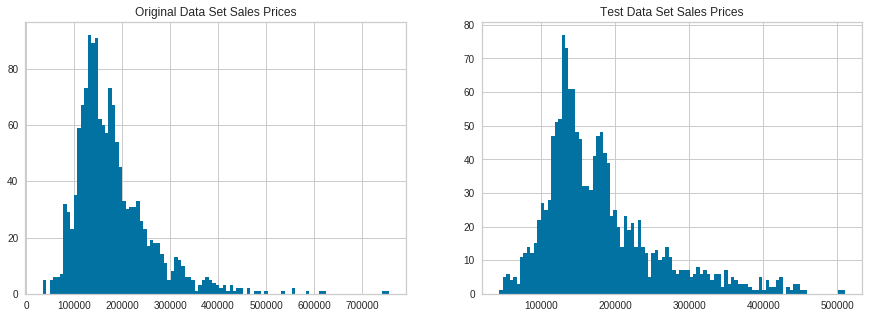

In [124]:
plt.subplot(1, 2, 1)
train.SalePrice.hist(bins = 100, figsize = (15,5))
plt.title('Original Data Set Sales Prices')
plt.subplot(1,2,2)
plt.hist(test_prediction_r, bins = 100)
plt.title('Test Data Set Sales Prices')
plt.show()

In [71]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "10.0.2" 2018-07-17; OpenJDK Runtime Environment (build 10.0.2+13-Ubuntu-1ubuntu0.18.04.4); OpenJDK 64-Bit Server VM (build 10.0.2+13-Ubuntu-1ubuntu0.18.04.4, mixed mode)
  Starting server from /home/m/anaconda3/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp811e9_92
  JVM stdout: /tmp/tmp811e9_92/h2o_m_started_from_python.out
  JVM stderr: /tmp/tmp811e9_92/h2o_m_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,03 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.0.2
H2O cluster version age:,1 month and 13 days
H2O cluster name:,H2O_from_python_m_bnxuqe
H2O cluster total nodes:,1
H2O cluster free memory:,1.377 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


In [72]:
# Load data into H2O
df = h2o.H2OFrame(train_X)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [73]:
df.describe()

Rows:1460
Cols:306




,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,Alley_Unavailable,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_Unavailable,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_Unavailable,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_Unavailable,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_Unavailable,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unavailable,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unavailable,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Electrical_Unavailable,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_Unavailable,Garage

In [74]:
y = "SalePrice"
splits = df.split_frame(ratios = [0.8], seed = 1)
train_aml = splits[0]
val = splits[1]

In [75]:
aml = H2OAutoML(max_runtime_secs = 60, seed = 1, project_name = "Housing Data Analysis")
aml.train(y = y, training_frame = train_aml, leaderboard_frame = val)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [76]:
aml.leaderboard.head()

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_BestOfFamily_AutoML_20190104_134403,0.0113005,0.106304,0.0113005,0.0782194,0.00819334
StackedEnsemble_AllModels_AutoML_20190104_134403,0.0113005,0.106304,0.0113005,0.0782194,0.00819334
XGBoost_1_AutoML_20190104_134403,0.013727,0.117162,0.013727,0.0844481,0.00902482
GLM_grid_1_AutoML_20190104_134403_model_1,0.0148006,0.121658,0.0148006,0.086818,0.00934338
DRF_1_AutoML_20190104_134403,0.017177,0.131061,0.017177,0.0939359,0.0101283
XRT_1_AutoML_20190104_134403,0.0174549,0.132117,0.0174549,0.0979803,0.010192


In [77]:
pred = aml.predict(val)
pred.head()

stackedensemble prediction progress: |████████████████████████████████████| 100%


predict
12.277
11.6499
12.7037
11.9552
11.3838
11.7319
12.038
11.7838
12.3429
12.1643


In [78]:
perf = aml.leader.model_performance(val)
perf


ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 0.01130053526428233
RMSE: 0.10630397576893505
MAE: 0.07821943720832428
RMSLE: 0.008193340141979944
R^2: 0.9324793927504783
Mean Residual Deviance: 0.01130053526428233
Null degrees of freedom: 294
Residual degrees of freedom: 291
Null deviance: 49.58251098775174
Residual deviance: 3.333657902963288
AIC: -475.2832952394578


In [79]:
#house_test = train_X[pd.DataFrame([set(X.columns).intersection(set(train_X.columns))]).T[0].tolist()]
#X = X[pd.DataFrame([set(X.columns).intersection(set(train_X.columns))]).T[0].tolist()]

In [80]:
np.exp(train_X['SalePrice']).describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [81]:
bins = [30900, 130000, 163000, 214000, 800000]
names = [1, 2, 3, 4]

In [82]:
names1 = ['Cheap','Lower Range', 'Mid-Range', 'Expensive'] 
train_X['SalePrice'] = np.exp(train_X['SalePrice'])
train_X['SalePriceRange'] = train_X['SalePrice']
train_X.SalePriceRange = pd.cut(train_X['SalePriceRange'], bins, labels = names)

In [83]:
X_c = train_X.drop(['SalePrice','SalePriceRange'], axis = 1)
y_c = train_X.SalePriceRange

In [84]:
X_c = X_c[pd.DataFrame([set(X_c.columns).intersection(set(test_X.columns))]).T[0]]
test_X = test_X[pd.DataFrame([set(test_X.columns).intersection(set(X_c.columns))]).T[0]]

In [85]:
X_train_c, X_val_c, y_train_c, y_val_c = train_test_split(X_c, y_c, test_size = 0.2, random_state = 1)

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier 
from xgboost import XGBClassifier

from yellowbrick.classifier import ConfusionMatrix

In [87]:
def model_fit(x):
    x.fit(X_train_c, y_train_c)
    y_pred = x.predict(X_val_c)
    model_fit.accuracy = accuracy_score(y_pred, y_val_c)
    print('Accuracy Score',accuracy_score(y_pred, y_val_c))
    print(classification_report(y_pred, y_val_c))
    #print('Confusion Matrix \n',confusion_matrix(y_pred, y_val_c))
    
    classes = names1
    
    model_cm = ConfusionMatrix(
    x, classes = classes,
    label_encoder = {1 : 'Cheap', 2 : 'Lower Range', 3 : 'Mid-Range', 4 : 'Expensive'})
    
    model_cm.fit(X_train_c, y_train_c)
    model_cm.score(X_val_c, y_val_c)
    
    model_cm.poof()    

Accuracy Score 0.6986301369863014
              precision    recall  f1-score   support

           1       0.93      0.71      0.81       112
           2       0.49      0.55      0.52        60
           3       0.62      0.66      0.64        71
           4       0.70      0.90      0.79        49

   micro avg       0.70      0.70      0.70       292
   macro avg       0.68      0.71      0.69       292
weighted avg       0.73      0.70      0.70       292



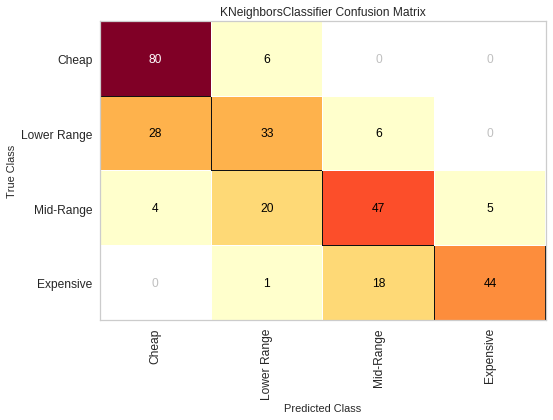

In [88]:
model_fit(KNeighborsClassifier(n_neighbors = 4))
KNN = model_fit.accuracy

Accuracy Score 0.7191780821917808
              precision    recall  f1-score   support

           1       0.87      0.78      0.82        96
           2       0.51      0.59      0.54        58
           3       0.62      0.67      0.64        70
           4       0.86      0.79      0.82        68

   micro avg       0.72      0.72      0.72       292
   macro avg       0.71      0.71      0.71       292
weighted avg       0.74      0.72      0.73       292



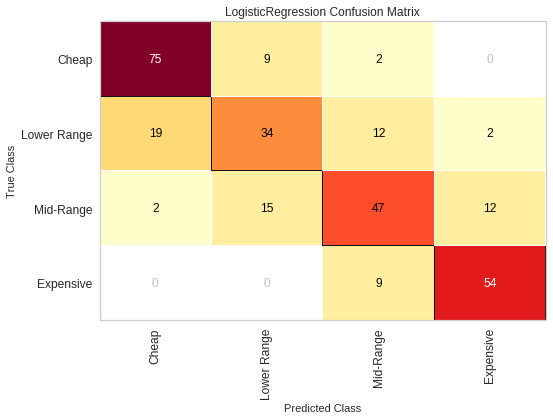

In [89]:
from sklearn.linear_model import LogisticRegression
model_fit(LogisticRegression())
Logistic = model_fit.accuracy

Accuracy Score 0.4520547945205479
              precision    recall  f1-score   support

           1       0.60      0.72      0.66        72
           2       0.22      0.37      0.28        41
           3       0.08      0.38      0.13        16
           4       0.94      0.36      0.52       163

   micro avg       0.45      0.45      0.45       292
   macro avg       0.46      0.46      0.40       292
weighted avg       0.71      0.45      0.50       292



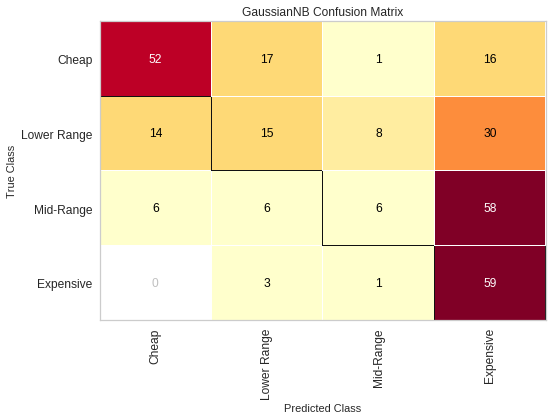

In [90]:
from sklearn.naive_bayes import GaussianNB
model_fit(GaussianNB())
Gaussian = model_fit.accuracy

Accuracy Score 0.6712328767123288
              precision    recall  f1-score   support

           1       0.76      0.74      0.75        88
           2       0.57      0.54      0.55        71
           3       0.57      0.65      0.61        66
           4       0.79      0.75      0.77        67

   micro avg       0.67      0.67      0.67       292
   macro avg       0.67      0.67      0.67       292
weighted avg       0.68      0.67      0.67       292



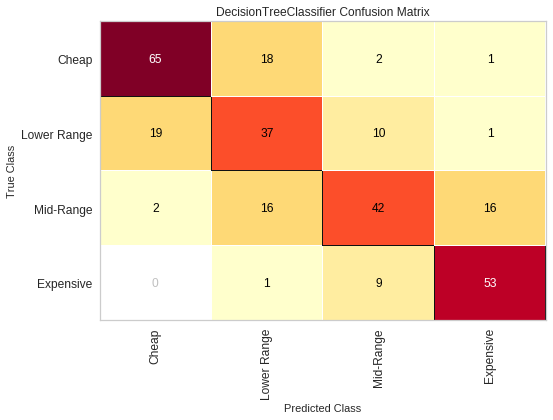

In [91]:
from sklearn import tree
model_fit(tree.DecisionTreeClassifier())
Tree = model_fit.accuracy

Accuracy Score 0.773972602739726
              precision    recall  f1-score   support

           1       0.86      0.80      0.83        93
           2       0.66      0.61      0.63        72
           3       0.74      0.79      0.76        71
           4       0.83      0.93      0.87        56

   micro avg       0.77      0.77      0.77       292
   macro avg       0.77      0.78      0.77       292
weighted avg       0.77      0.77      0.77       292



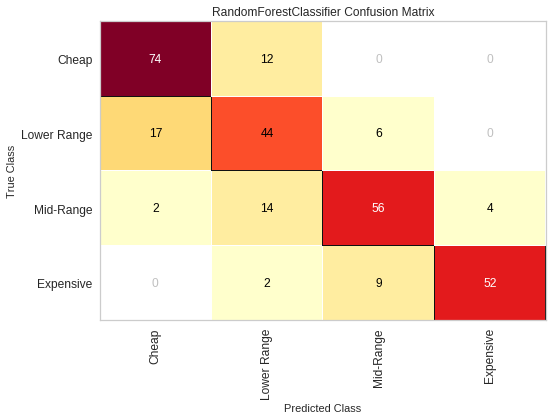

In [95]:
from sklearn.ensemble import RandomForestClassifier
model_fit(RandomForestClassifier(n_estimators = 100, max_depth =10, random_state = 1))
RandomForest = model_fit.accuracy

In [96]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'max_depth' : [1, 5, 10],
              'learning_rate' : [0.01, 0.1], 
              'n_estimators' :[5, 10, 15]}

xgb = XGBClassifier()
xgb_cv = RandomizedSearchCV(xgb, param_grid, cv = 5)
xgb_cv.fit(X_train_c, y_train_c)
print(xgb_cv.best_params_)
print(xgb_cv.best_score_)

/home/m/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_estimators': 10, 'max_depth': 10, 'learning_rate': 0.1}
0.7148972602739726


Accuracy Score 0.7636986301369864
              precision    recall  f1-score   support

           1       0.86      0.82      0.84        90
           2       0.63      0.58      0.60        72
           3       0.70      0.78      0.74        68
           4       0.86      0.87      0.86        62

   micro avg       0.76      0.76      0.76       292
   macro avg       0.76      0.76      0.76       292
weighted avg       0.76      0.76      0.76       292



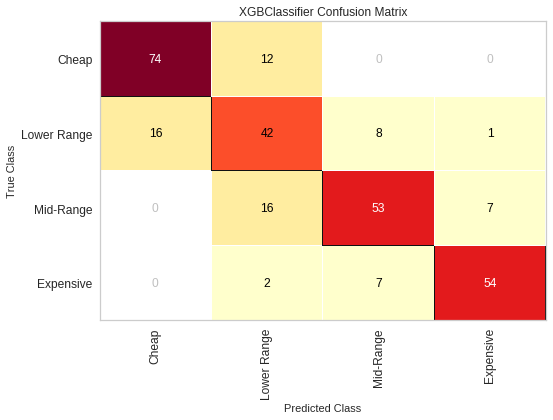

In [97]:
model_fit(XGBClassifier(max_depth=25, learning_rate=0.1, n_estimators=1800, silent=True, 
                        objective='multi:softprop', booster='gbtree', n_jobs=2, 
                        nthread=None, gamma=0, min_child_weight=1, max_delta_step=0, 
                        subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, 
                        reg_lambda=1, scale_pos_weight=1, base_score=0.5, random_state=1, 
                        seed=None, missing=None))
XGBClf = model_fit.accuracy

In [98]:
scores_list_1 = ['KNN','Logistic','Gaussian','Tree','RandomForest','XGBClassifier']
scores_1 = [KNN, Logistic, Gaussian, Tree, RandomForest, XGBClf]

In [99]:
score_df_classification = pd.DataFrame([scores_list_1, scores_1]).T

In [100]:
score_df_classification.index = score_df_classification[0]
del score_df_classification[0]
score_df_classification

,1
0,
KNN,0.69863
Logistic,0.719178
Gaussian,0.452055
Tree,0.671233
RandomForest,0.773973
XGBClassifier,0.763699


In [101]:
test_prediction = XGBClassifier(max_depth=25, learning_rate=0.1, n_estimators=1800, silent=True, 
                        objective='multi:softprop', booster='gbtree', n_jobs=2, 
                        nthread=None, gamma=0, min_child_weight=1, max_delta_step=0, 
                        subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, 
                        reg_lambda=1, scale_pos_weight=1, base_score=0.5, random_state=1, 
                        seed=None, missing=None).fit(X_train_c,y_train_c).predict(test_X)

In [102]:
test_prediction

array([2, 2, 3, ..., 3, 1, 4])

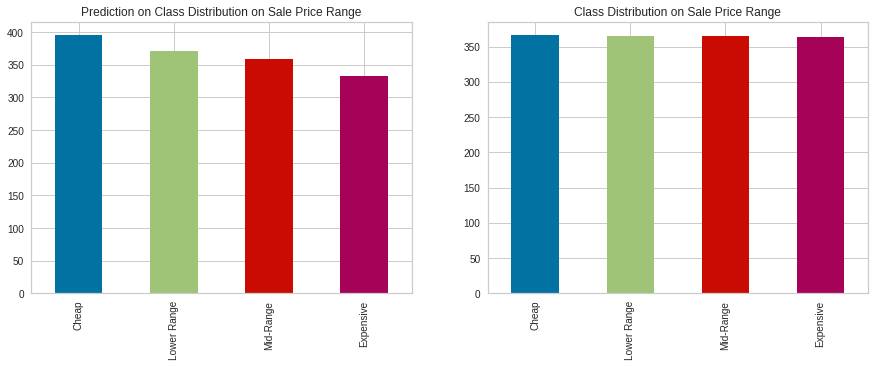

In [103]:
plt.subplot(1,2,1)
pd.DataFrame(test_prediction)[0].value_counts().plot.bar(figsize = (15,5))
plt.xticks([0, 1, 2, 3], names1)
plt.title('Prediction on Class Distribution on Sale Price Range')

plt.subplot(1,2,2)
train_X.SalePriceRange.value_counts().plot.bar()
plt.xticks([0, 1, 2, 3], names1)
plt.title('Class Distribution on Sale Price Range')
plt.show()